In [ ]:
%%capture
#@title Downloads/imports
!pip install nba_api
!pip install scikit-learn-extra
import ipywidgets as widgets
import pandas as pd
import numpy as np
from nba_api.stats.endpoints import CommonPlayerInfo
from nba_api.stats.endpoints import PlayerCareerStats
from nba_api.stats.endpoints import PlayerGameLog
from nba_api.stats.static import players
#from typing_extensions import final
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn_extra.cluster import KMedoids

# Build the dataframe of gamelogs for Sixth Man of the Year Winners since 2003-2004

In [ ]:
# search for each id of 6th man winners, Antawn Jamison is 2003-2004
playerName = "Antawn Jamison"
findPlayer = players.find_players_by_full_name(playerName)
print(findPlayer[0]['id'])

1712


In [ ]:
# build a data frame of sixth man winners' gamelogs by year
sixManWinnersSince0304ID = [1712, 2732, 2034, 2571, 1938, 1891, 2037, 1885, 201935, 2747, 2037, 101150, 2037,
                            201569, 101150, 101150, 1626149, 203903, 1629639, 1627763] # found suing the method above
winnerDF = [] # dataframe to hold the statistics of the winners
year = 2003
year2 = 2004

for playerIDtoScrape in sixManWinnersSince0304ID: # find the player by id, add their award-winning season to data frame
  currentYearStats = PlayerGameLog(player_id=playerIDtoScrape, season=f"{year}-{str(year2)[-2:]}", season_type_all_star='Regular Season')
  currentYearDF = currentYearStats.get_data_frames()[0]
  winnerDF.append(currentYearDF)

  year += 1
  year2 += 1

sixManData = pd.concat(winnerDF) # concatenate into one data frame
print(sixManData)

   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22003       1712  0020301186  APR 14, 2004    DAL @ HOU  W   27    5   
1      22003       1712  0020301173  APR 13, 2004  DAL vs. MEM  W   32    8   
2      22003       1712  0020301159  APR 11, 2004    DAL @ GSW  L   32    5   
3      22003       1712  0020301147  APR 10, 2004    DAL @ SEA  L   37    9   
4      22003       1712  0020301134  APR 08, 2004  DAL vs. UTA  W   25    8   
..       ...        ...         ...           ...          ... ..  ...  ...   
62     22022    1627763  0022200072  OCT 28, 2022  BOS vs. CLE  L   22    3   
63     22022    1627763  0022200047  OCT 24, 2022    BOS @ CHI  L   22    5   
64     22022    1627763  0022200030  OCT 22, 2022    BOS @ ORL  W   21    4   
65     22022    1627763  0022200022  OCT 21, 2022    BOS @ MIA  W   25    2   
66     22022    1627763  0022200001  OCT 18, 2022  BOS vs. PHI  W   24    7   

    FGA  FG_PCT  ...  DREB  REB  AST  STL  BLK  TOV

In [ ]:
sixManData.isna().sum() # make sure the sith man data has no missing values

SEASON_ID          0
Player_ID          0
Game_ID            0
GAME_DATE          0
MATCHUP            0
WL                 0
MIN                0
FGM                0
FGA                0
FG_PCT             0
FG3M               0
FG3A               0
FG3_PCT            0
FTM                0
FTA                0
FT_PCT             0
OREB               0
DREB               0
REB                0
AST                0
STL                0
BLK                0
TOV                0
PF                 0
PTS                0
PLUS_MINUS         0
VIDEO_AVAILABLE    0
dtype: int64

# Build the dataframe of gamelogs for Defensive Player of the Year Winners since 2001-2002

In [ ]:
# search for each id of dpoy winners, ben wallace is 2001-2002
playerName = "Ben Wallace"
playerDict = players.find_players_by_full_name(playerName)
print(playerDict[0]['id'])

1112


In [ ]:
# build a data frame of defensive player of the year winners' gamelogs by year. Same methodology as above
dpoyWinnersSince0102ID = [1112, 1112, 1897, 1112, 1112, 948, 708, 2730, 2730, 2730, 2199,
                          201188, 201149, 202695, 202695, 203110, 203497, 203497, 203507, 203497, 203935, 1628991]
dpoyDF = []
year = 2001
year2 = 2002

for playerIDtoScrape in dpoyWinnersSince0102ID:
  currentYearStats = PlayerGameLog(player_id=playerIDtoScrape, season=f"{year}-{str(year2)[-2:]}", season_type_all_star='Regular Season')
  currentYearDF = currentYearStats.get_data_frames()[0]
  dpoyDF.append(currentYearDF)

  year += 1
  year2 += 1

dpoyData = pd.concat(dpoyDF)
print(dpoyData)

   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22001       1112  0020101181  APR 17, 2002  DET vs. MIL  W   33    5   
1      22001       1112  0020101167  APR 16, 2002    DET @ NJN  W   43    5   
2      22001       1112  0020101150  APR 13, 2002    DET @ CHI  W   42    7   
3      22001       1112  0020101142  APR 12, 2002  DET vs. SAS  L   42    3   
4      22001       1112  0020101082  APR 05, 2002    DET @ PHI  W   36    1   
..       ...        ...         ...           ...          ... ..  ...  ...   
58     22022    1628991  0022200296  NOV 27, 2022    MEM @ NYK  W   30    8   
59     22022    1628991  0022200279  NOV 25, 2022  MEM vs. NOP  W   22    6   
60     22022    1628991  0022200257  NOV 22, 2022  MEM vs. SAC  L   27    8   
61     22022    1628991  0022200229  NOV 18, 2022  MEM vs. OKC  W   25    7   
62     22022    1628991  0022200206  NOV 15, 2022    MEM @ NOP  L   25    3   

    FGA  FG_PCT  ...  DREB  REB  AST  STL  BLK  TOV

In [ ]:
dpoyData.isna().sum()

SEASON_ID          0
Player_ID          0
Game_ID            0
GAME_DATE          0
MATCHUP            0
WL                 0
MIN                0
FGM                0
FGA                0
FG_PCT             0
FG3M               0
FG3A               0
FG3_PCT            0
FTM                0
FTA                0
FT_PCT             0
OREB               0
DREB               0
REB                0
AST                0
STL                0
BLK                0
TOV                0
PF                 0
PTS                0
PLUS_MINUS         0
VIDEO_AVAILABLE    0
dtype: int64

# KMeans and data processing: early tests

In [ ]:
sixManData = sixManData[sixManData['MIN'] > 15] # needs to be more than 15 minutes played per game
sixManData.shape # only takes away 27 observations

(1463, 27)

In [ ]:
# initial function to calculate KMeans clustering between two inputted stats and inputted number of clusters
def kMeansTwoStat(stat1, stat2, nClusters):
  stat1Mean = sixManData.groupby('SEASON_ID')[stat1].mean() # season average for input stat
  stat2Mean = sixManData.groupby('SEASON_ID')[stat2].mean()

  stat1Array = stat1Mean.values.reshape(-1, 1) # reshape into an array
  stat2Array = stat2Mean.values.reshape(-1, 1)

  if 'PCT' in stat1: # some stats are percentages. Display those on the relevant axis [0, 1]
    plt.xlim(0, 1)
  if 'PCT' in stat2:
    plt.ylim(0, 1)

  twoStatArray = np.hstack((stat1Array, stat2Array))

  # follows the logic of fitting KMeans as in Lab 14
  km2Stat = KMeans(n_clusters=nClusters)
  km2Stat.fit(twoStatArray)
  cs2Stat = km2Stat.cluster_centers_

  plt.scatter(stat1Array, stat2Array)
  plt.scatter(cs2Stat.T[0], cs2Stat.T[1], c = 'green')
  plt.title(f"{stat1} vs. {stat2}")
  plt.xlabel(stat1)
  plt.ylabel(stat2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


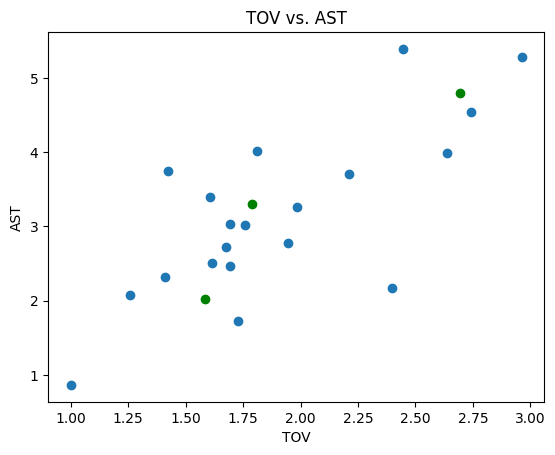

In [ ]:
kMeansTwoStat('TOV', 'AST', 3) # 3 clusters chosen arbitrarily here

# KMeans at the base level

In [ ]:
def generate_blobs(k, n, width, d=2): # generate_blobs from Lab 14
  C = np.random.random((1, k, d))
  X = C + np.random.randn(n, k, d)*width
  return X.reshape((k*n, d))

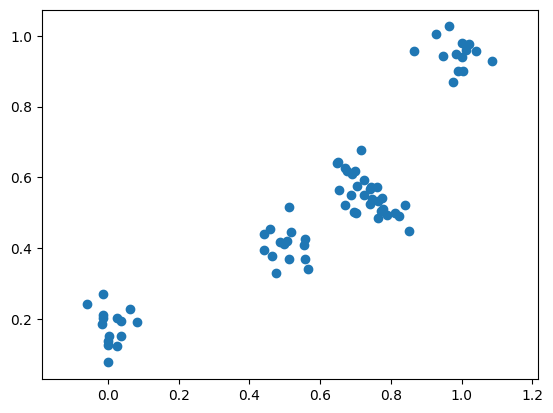

In [ ]:
np.random.seed(196) # new seed and new values in the function
X = generate_blobs(5, 15, 0.05)
plt.scatter(X.T[0], X.T[1])
plt.axis('equal');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


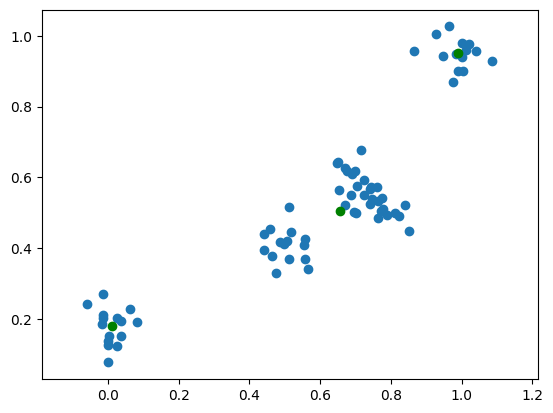

In [ ]:
kmeansTest = KMeans(n_clusters=3)
kmeansTest.fit(X)
csTest = kmeansTest.cluster_centers_
plt.scatter(X.T[0], X.T[1])
plt.scatter(csTest.T[0], csTest.T[1], c = 'green')
plt.axis('equal');

# Problem with KMeans: Initial cluster location

(-1.0, 21.0, -0.1, 2.1)

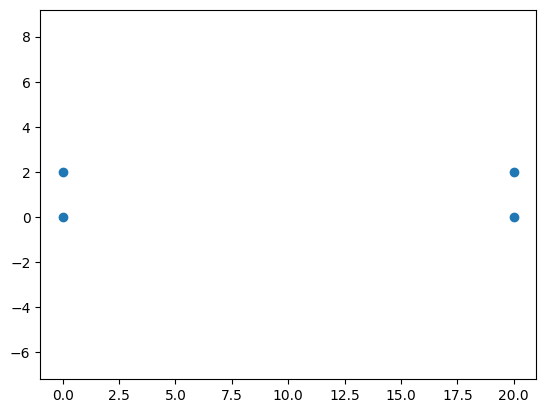

In [ ]:
badPoints = C = np.array([(0, 0), (20, 0), (0, 2), (20, 2)]) # or really, any 4 point rectangle where width > height
plt.scatter(badPoints.T[0], badPoints.T[1])
plt.axis('equal')

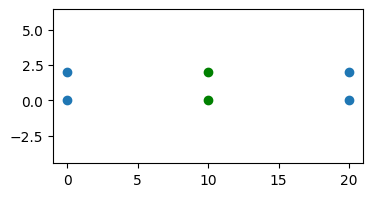

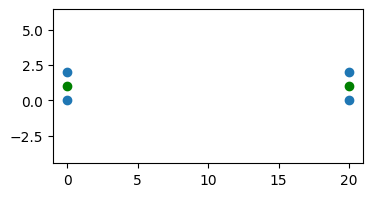

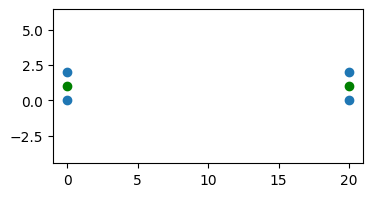

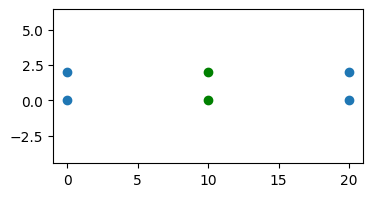

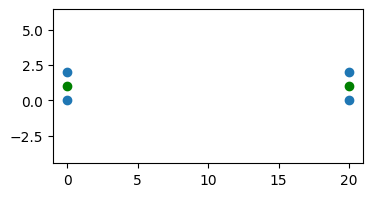

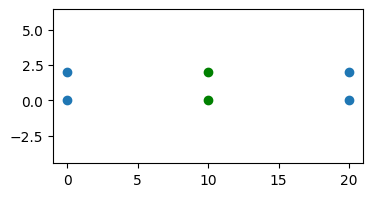

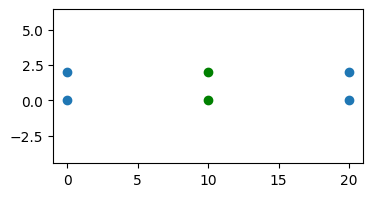

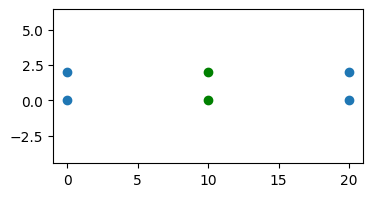

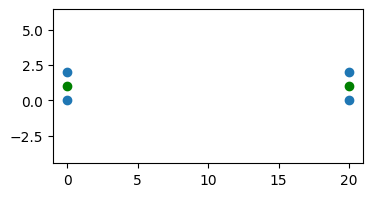

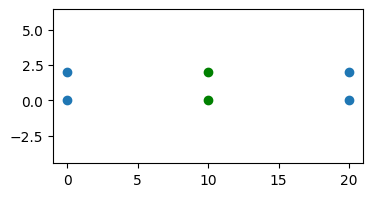

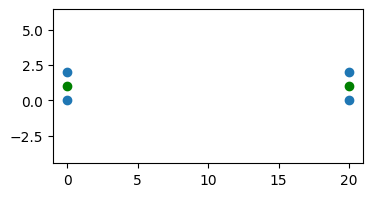

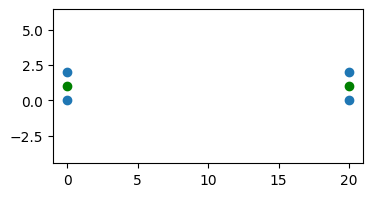

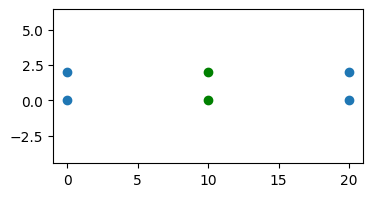

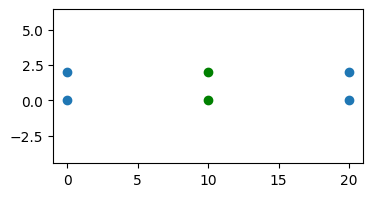

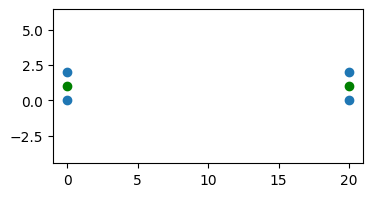

In [ ]:
for _ in range(15): # run Kmeans 15 times
  kmeansBad = KMeans(n_clusters=2, init='random', n_init=1) # only one one iteration of KMeans per graph,
                                                            # init='random'for random cluster init
  kmeansBad.fit(badPoints)
  badTest = kmeansBad.cluster_centers_
  plt.figure(figsize=(4, 2))
  plt.scatter(badPoints.T[0], badPoints.T[1])
  plt.scatter(badTest.T[0], badTest.T[1], c = 'green')
  plt.axis('equal');
plt.show()

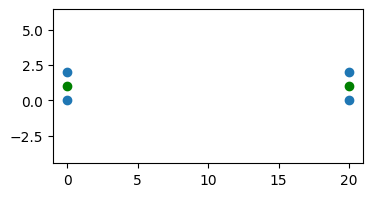

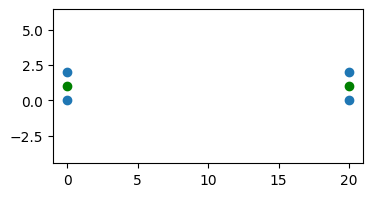

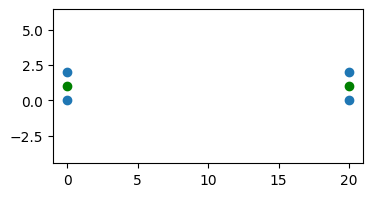

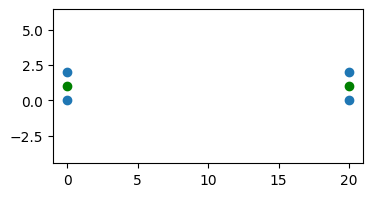

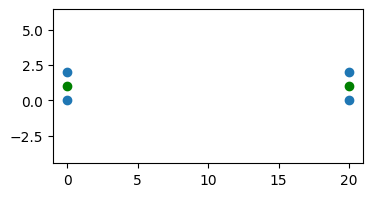

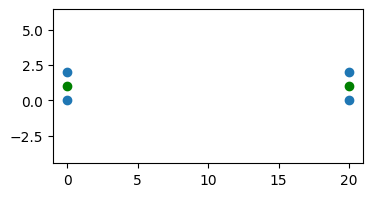

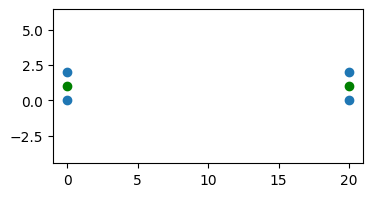

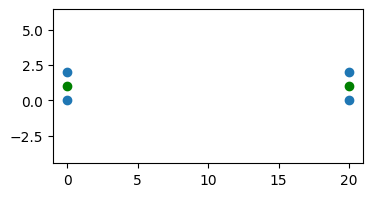

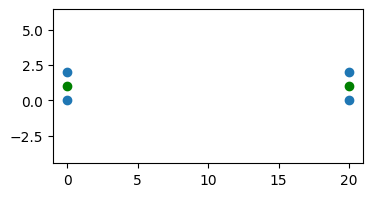

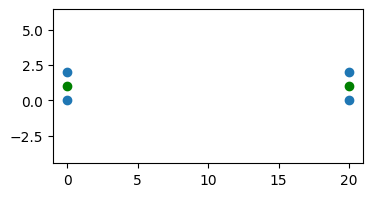

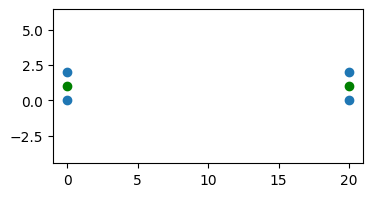

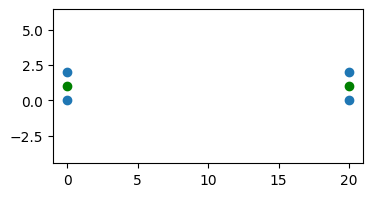

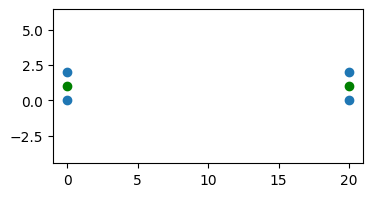

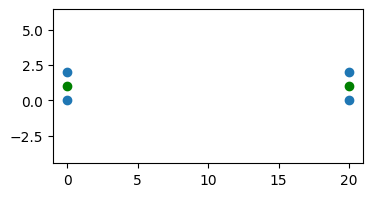

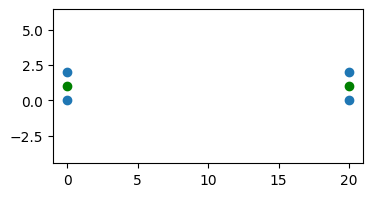

In [ ]:
for _ in range(15): # run KMeans 15 more times, this time using k-means++ (on by default)
  kmeansBad = KMeans(n_clusters=2, n_init=1)
  kmeansBad.fit(badPoints)
  badTest = kmeansBad.cluster_centers_
  plt.figure(figsize=(4, 2))
  plt.scatter(badPoints.T[0], badPoints.T[1])
  plt.scatter(badTest.T[0], badTest.T[1], c = 'green')
  plt.axis('equal');
plt.show()

# Problem: Clusters against inertia

## Setting up the data

In [ ]:
def generate_blobs(k, n, width, d=2):
  C = np.random.random((1, k, d))
  X = C + np.random.randn(n, k, d)*width
  return X.reshape((k*n, d))

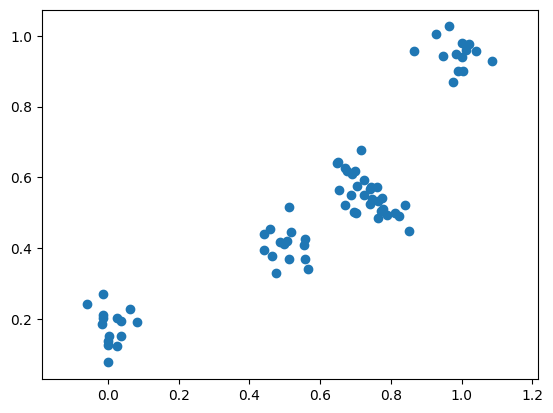

In [ ]:
np.random.seed(196)
X = generate_blobs(5, 15, 0.05)
plt.scatter(X.T[0], X.T[1])
plt.axis('equal');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


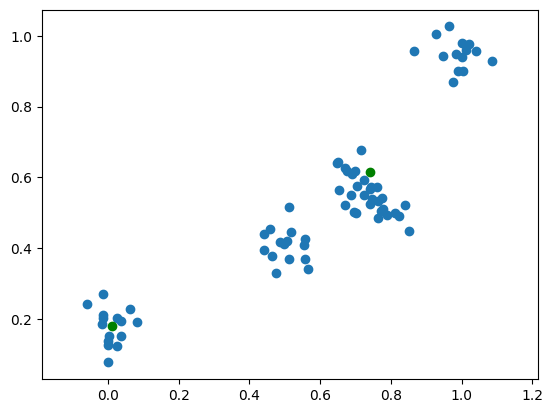

In [ ]:
# too few clusters means less insight into patterns and too much variance
kmeansTest = KMeans(n_clusters=2)
kmeansTest.fit(X)
csTest = kmeansTest.cluster_centers_
plt.scatter(X.T[0], X.T[1])
plt.scatter(csTest.T[0], csTest.T[1], c = 'green')
plt.axis('equal');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


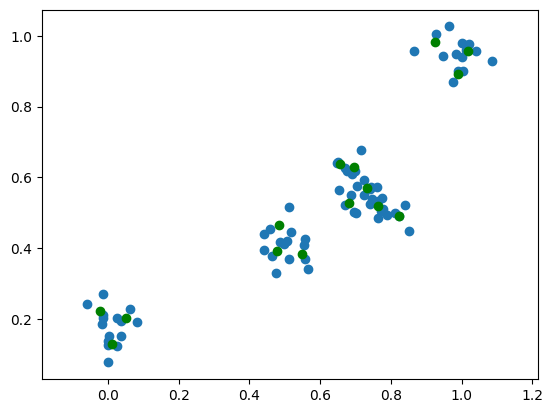

In [ ]:
# too many clusters means overfitting and redundancy
kmeansTest = KMeans(n_clusters=15)
kmeansTest.fit(X)
csTest = kmeansTest.cluster_centers_
plt.scatter(X.T[0], X.T[1])
plt.scatter(csTest.T[0], csTest.T[1], c = 'green')
plt.axis('equal');

## Elbow Method

Text(0.5, 1.0, 'Elbow Plot')

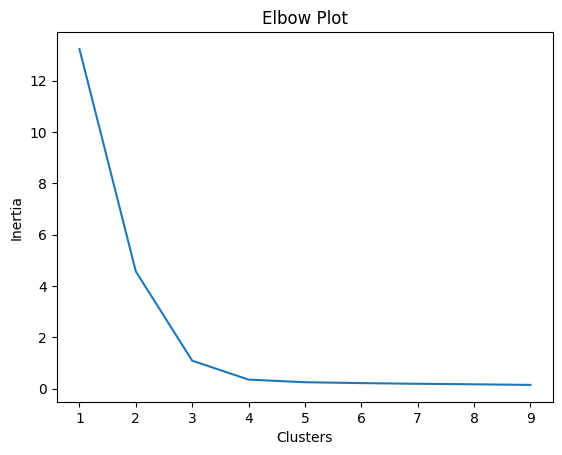

In [ ]:
inertia = []
for i in range(1, 10):
  kmeansTest = KMeans(n_clusters=i, n_init = 10) # set to 10 to get the warning to go away
  kmeansTest.fit(X)
  inertia.append(kmeansTest.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Plot")

## Silhouette

Text(0.5, 1.0, 'Silhouette Plot')

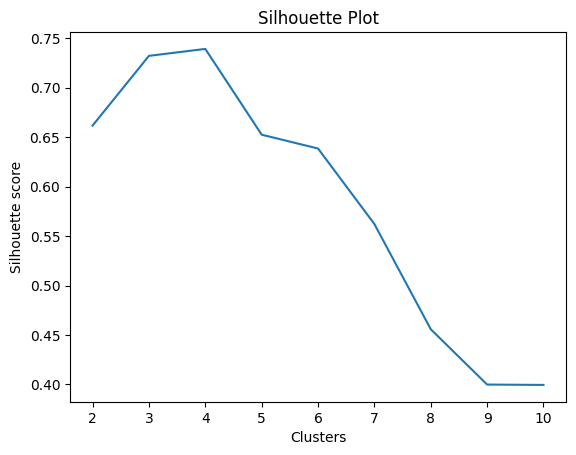

In [ ]:
silhScores = []

for i in range(2, 11):
  kmeansTest = KMeans(n_clusters=i, n_init = 10) # set to 10 to get the warning to go away
  kmeansTest.fit(X)
  silhScores.append(silhouette_score(X, kmeansTest.labels_))

plt.plot(range(2, 11), silhScores)
plt.xlabel("Clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette Plot")

## Davies-Bouldin Index

Text(0.5, 1.0, 'Davies-Bouldin Plot')

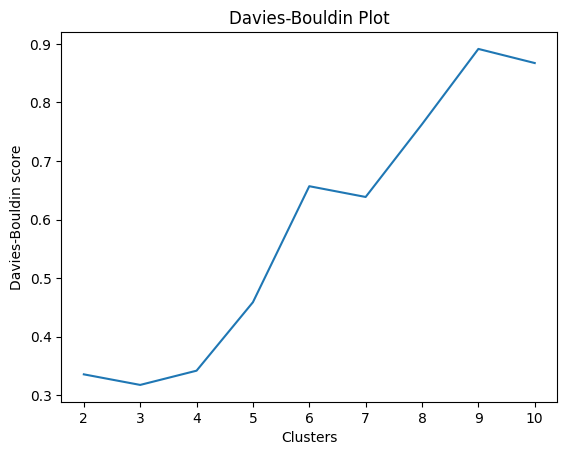

In [ ]:
dbScores = []

for i in range(2, 11):
  kmeansTest = KMeans(n_clusters=i, n_init = 10) # set to 10 to get the warning to go away
  kmeansTest.fit(X)
  dbScores.append(davies_bouldin_score(X, kmeansTest.labels_))

plt.plot(range(2, 11), dbScores)
plt.xlabel("Clusters")
plt.ylabel("Davies-Bouldin score")
plt.title("Davies-Bouldin Plot")

## Calinski-Harabasz Index

Text(0.5, 1.0, 'Calinski-Harabasz Plot')

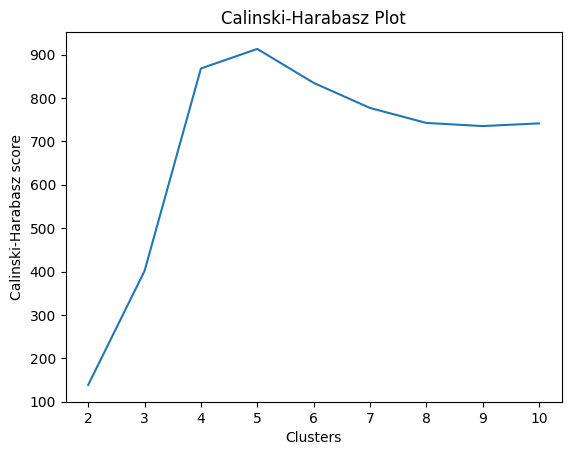

In [ ]:
calScores = []

for i in range(2, 11):
  kmeansTest = KMeans(n_clusters=i, n_init = 10) # set to 10 to get the warning to go away
  kmeansTest.fit(X)
  calScores.append(calinski_harabasz_score(X, kmeansTest.labels_))

plt.plot(range(2, 11), calScores)
plt.xlabel("Clusters")
plt.ylabel("Calinski-Harabasz score")
plt.title("Calinski-Harabasz Plot")

# Sensitivity to Outliers and k-medoids

(-11.75, 26.75, -5.75, 10.75)

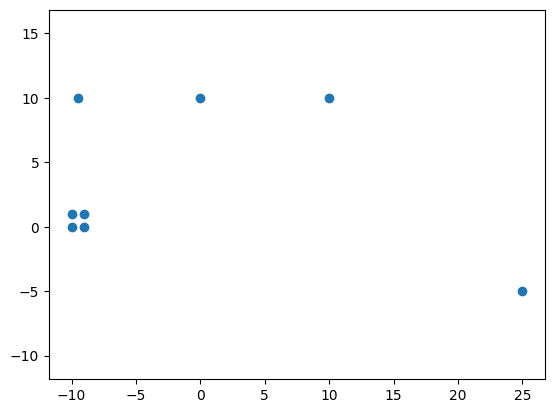

In [ ]:
# new points with one obvious cluster and other outlying points
badPoints2 = C = np.array([(-10, 0), (-9, 0), (-10, 1), (-9, 1), (-9.5, 10), (0, 10), (10, 10), (25, -5)])
plt.scatter(badPoints2.T[0], badPoints2.T[1])
plt.axis('equal')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


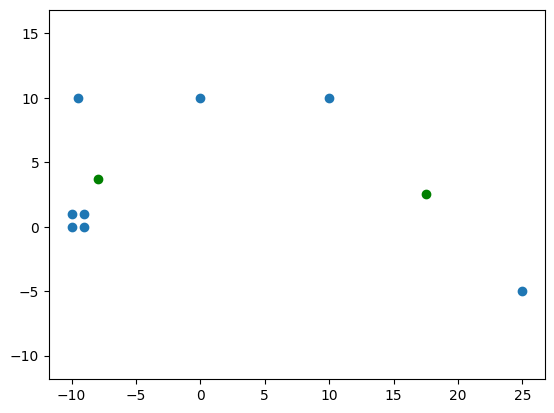

In [ ]:
kmeansOutlier = KMeans(n_clusters=2)
kmeansOutlier.fit(badPoints2)
outlierTest = kmeansOutlier.cluster_centers_
plt.scatter(badPoints2.T[0], badPoints2.T[1])
plt.scatter(outlierTest.T[0], outlierTest.T[1], c = 'green')
plt.axis('equal');

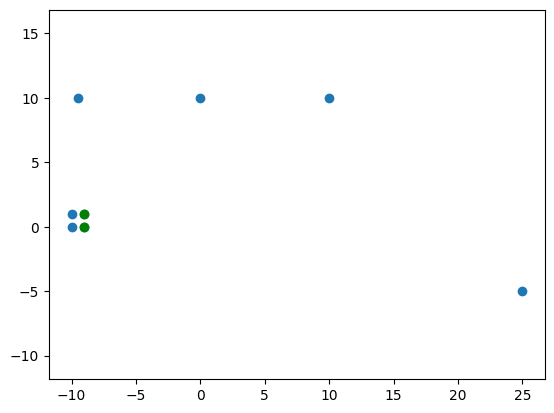

In [ ]:
kmedOutlier = KMedoids(n_clusters=2)
kmedOutlier.fit(badPoints2)
outlierTest2 = kmedOutlier.cluster_centers_
plt.scatter(badPoints2.T[0], badPoints2.T[1])
plt.scatter(outlierTest2.T[0], outlierTest2.T[1], c = 'green')
plt.axis('equal');

In [ ]:
# far lower inertia for k-medoids
print(kmedOutlier.inertia_)
print(kmeansOutlier.inertia_)

79.13127684652564
422.5416666666667


# Returning to the NBA data

## Defensive Player of the Year: Steals vs. Blocks

In [ ]:
def kMeansTwoStat(stat1, stat2, nClusters):
  stat1Mean = dpoyData.groupby('SEASON_ID')[stat1].mean()
  stat2Mean = dpoyData.groupby('SEASON_ID')[stat2].mean()

  stat1Array = stat1Mean.values.reshape(-1, 1)
  stat2Array = stat2Mean.values.reshape(-1, 1)

  if 'PCT' in stat1:
    plt.xlim(0, 1)
  if 'PCT' in stat2:
    plt.ylim(0, 1)

  twoStatArray = np.hstack((stat1Array, stat2Array))

  km2Stat = KMeans(n_clusters=nClusters)
  km2Stat.fit(twoStatArray)
  cs2Stat = km2Stat.cluster_centers_

  plt.scatter(stat1Array, stat2Array)
  plt.scatter(cs2Stat.T[0], cs2Stat.T[1], c = 'green')
  plt.title(f"{stat1} vs. {stat2}")
  plt.xlabel(stat1)
  plt.ylabel(stat2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


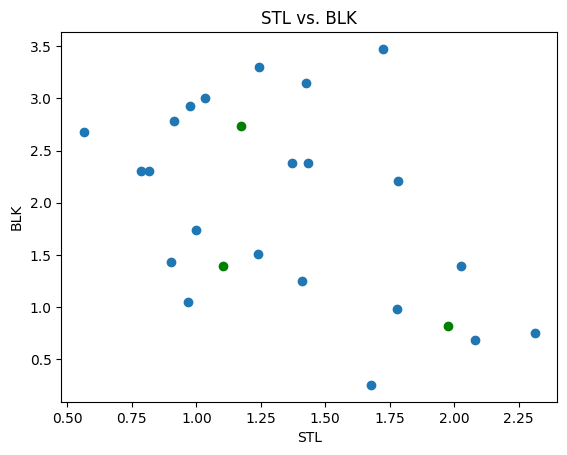

In [ ]:
kMeansTwoStat('STL', 'BLK', 3) # 3 clusters arbitrarily chosen at this point

### Optimal number of clusters

Text(0.5, 1.0, 'Elbow Plot')

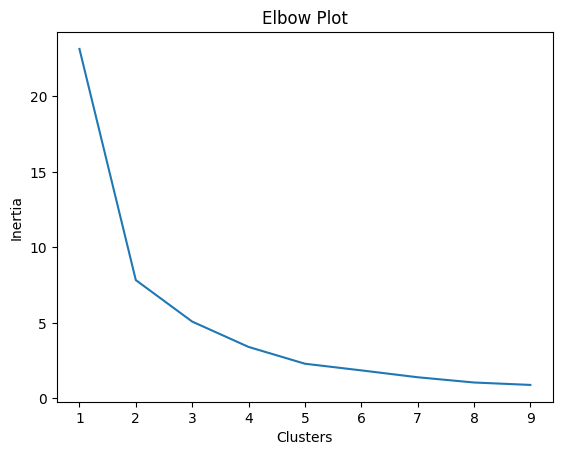

In [ ]:
# Elbow plot
inertia = []

stealsMean = dpoyData.groupby('SEASON_ID')['STL'].mean()
blocksMean = dpoyData.groupby('SEASON_ID')['BLK'].mean()
stealsArray = stealsMean.values.reshape(-1, 1)
blocksArray = blocksMean.values.reshape(-1, 1)
twoStatArray = np.hstack((stealsArray, blocksArray))

for i in range(1, 10):
  kmeansTest = KMeans(n_clusters=i, n_init = 10) # set to 10 to get the warning to go away
  kmeansTest.fit(twoStatArray)
  inertia.append(kmeansTest.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Plot")

Text(0.5, 1.0, 'Silhouette Plot')

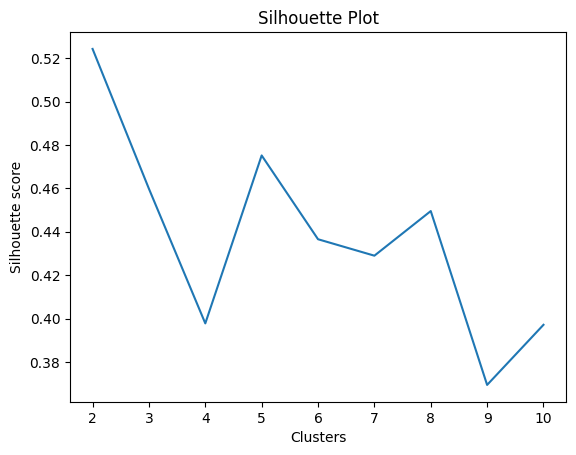

In [ ]:
# Silhouette
silhScores = []

stealsMean = dpoyData.groupby('SEASON_ID')['STL'].mean()
blocksMean = dpoyData.groupby('SEASON_ID')['BLK'].mean()
stealsArray = stealsMean.values.reshape(-1, 1)
blocksArray = blocksMean.values.reshape(-1, 1)
twoStatArray = np.hstack((stealsArray, blocksArray))

for i in range(2, 11):
  kmeansTest = KMeans(n_clusters=i, n_init = 10) # set to 10 to get the warning to go away
  kmeansTest.fit(twoStatArray)
  silhScores.append(silhouette_score(twoStatArray, kmeansTest.labels_))

plt.plot(range(2, 11), silhScores)
plt.xlabel("Clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette Plot")

Text(0.5, 1.0, 'Davies-Bouldin Plot')

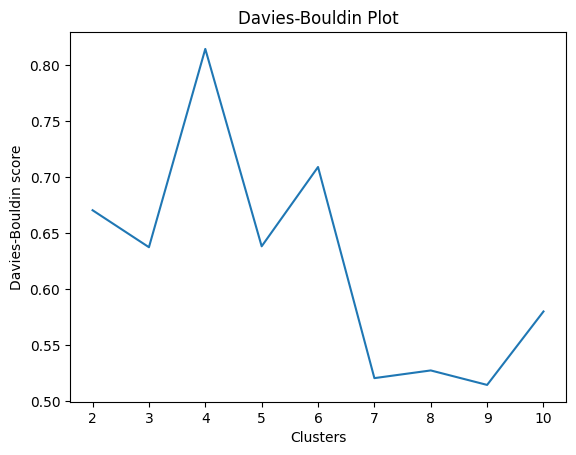

In [ ]:
# Davies-Bouldin
dbScores = []

stealsMean = dpoyData.groupby('SEASON_ID')['STL'].mean()
blocksMean = dpoyData.groupby('SEASON_ID')['BLK'].mean()
stealsArray = stealsMean.values.reshape(-1, 1)
blocksArray = blocksMean.values.reshape(-1, 1)
twoStatArray = np.hstack((stealsArray, blocksArray))

for i in range(2, 11):
  kmeansTest = KMeans(n_clusters=i, n_init = 10) # set to 10 to get the warning to go away
  kmeansTest.fit(twoStatArray)
  dbScores.append(davies_bouldin_score(twoStatArray, kmeansTest.labels_))

plt.plot(range(2, 11), dbScores)
plt.xlabel("Clusters")
plt.ylabel("Davies-Bouldin score")
plt.title("Davies-Bouldin Plot")

Text(0.5, 1.0, 'Calinski-Harabasz Plot')

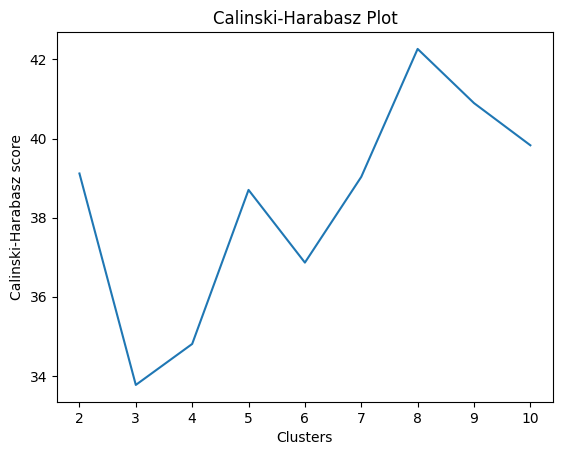

In [ ]:
# Cali-Hara
calScores = []

stealsMean = dpoyData.groupby('SEASON_ID')['STL'].mean()
blocksMean = dpoyData.groupby('SEASON_ID')['BLK'].mean()
stealsArray = stealsMean.values.reshape(-1, 1)
blocksArray = blocksMean.values.reshape(-1, 1)
twoStatArray = np.hstack((stealsArray, blocksArray))

for i in range(2, 11):
  kmeansTest = KMeans(n_clusters=i, n_init = 10) # set to 10 to get the warning to go away
  kmeansTest.fit(twoStatArray)
  calScores.append(calinski_harabasz_score(twoStatArray, kmeansTest.labels_))

plt.plot(range(2, 11), calScores)
plt.xlabel("Clusters")
plt.ylabel("Calinski-Harabasz score")
plt.title("Calinski-Harabasz Plot")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


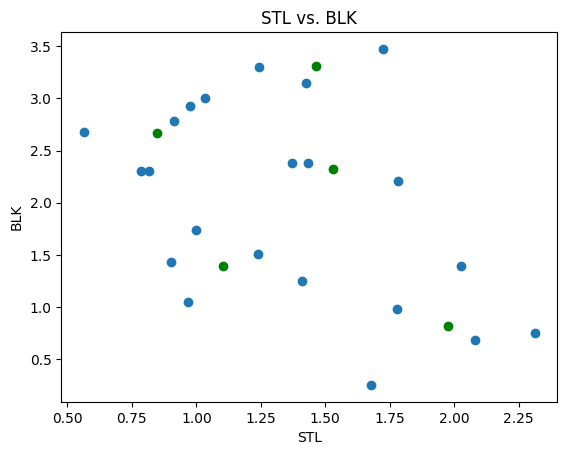

In [ ]:
kMeansTwoStat('STL', 'BLK', 5)

Text(0, 0.5, 'BLK')

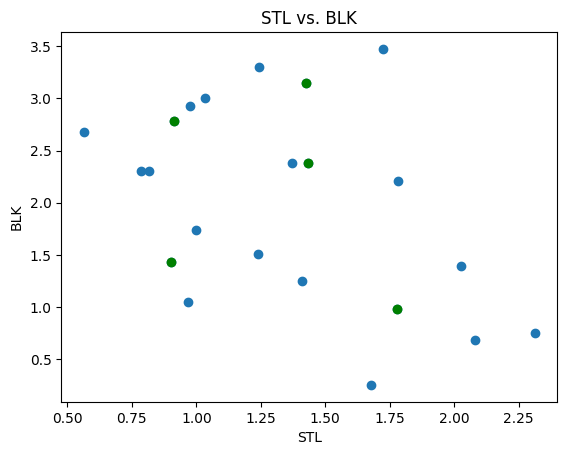

In [ ]:
kmedDpoy = KMedoids(n_clusters=5)
kmedDpoy.fit(twoStatArray)
dpoyTest = kmedDpoy.cluster_centers_
plt.scatter(twoStatArray.T[0], twoStatArray.T[1])
plt.scatter(dpoyTest.T[0], dpoyTest.T[1], c = 'green')
plt.title(f"STL vs. BLK")
plt.xlabel("STL")
plt.ylabel("BLK")

In [ ]:
inertiaTest = KMeans(n_clusters=5)
inertiaTest.fit(twoStatArray)
print(inertiaTest.inertia_)
print(kmedDpoy.inertia_)

2.290993454402291
6.6133197036833575


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Sixth Man of the Year: Minutes vs. Plus Minus

In [ ]:
def kMeansTwoStat(stat1, stat2, nClusters):
  stat1Mean = sixManData.groupby('SEASON_ID')[stat1].mean()
  stat2Mean = sixManData.groupby('SEASON_ID')[stat2].mean()

  stat1Array = stat1Mean.values.reshape(-1, 1)
  stat2Array = stat2Mean.values.reshape(-1, 1)

  if 'PCT' in stat1:
    plt.xlim(0, 1)
  if 'PCT' in stat2:
    plt.ylim(0, 1)

  twoStatArray = np.hstack((stat1Array, stat2Array))

  km2Stat = KMeans(n_clusters=nClusters)
  km2Stat.fit(twoStatArray)
  cs2Stat = km2Stat.cluster_centers_

  plt.scatter(stat1Array, stat2Array)
  plt.scatter(cs2Stat.T[0], cs2Stat.T[1], c = 'green')
  plt.title(f"{stat1} vs. {stat2}")
  plt.xlabel(stat1)
  plt.ylabel(stat2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


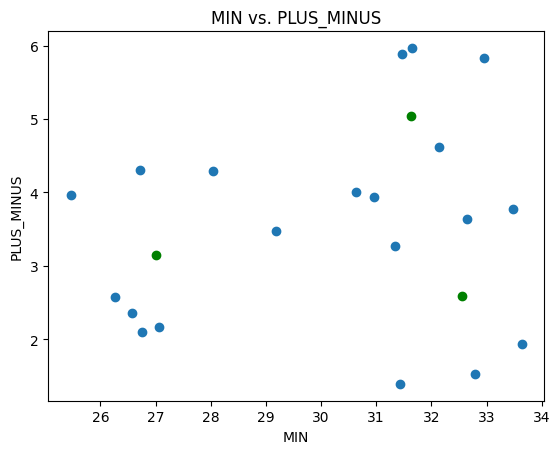

In [ ]:
kMeansTwoStat('MIN', 'PLUS_MINUS', 3) # 3 chosen arbitrarily again

### Optimal number of clusters

Text(0.5, 1.0, 'Elbow Plot')

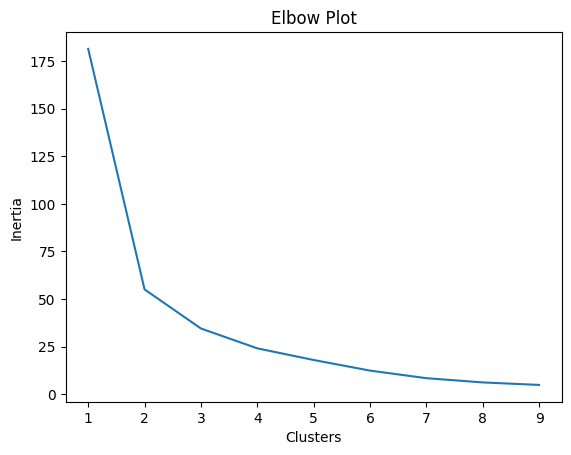

In [ ]:
# Elbow plot
inertia = []

minutesMean = sixManData.groupby('SEASON_ID')['MIN'].mean()
pmMean = sixManData.groupby('SEASON_ID')['PLUS_MINUS'].mean()
minutesArray = minutesMean.values.reshape(-1, 1)
pmArray = pmMean.values.reshape(-1, 1)
twoStatArray = np.hstack((minutesArray, pmArray))

for i in range(1, 10):
  kmeansTest = KMeans(n_clusters=i, n_init = 10) # set to 10 to get the warning to go away
  kmeansTest.fit(twoStatArray)
  inertia.append(kmeansTest.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Plot")

Text(0.5, 1.0, 'Silhouette Plot')

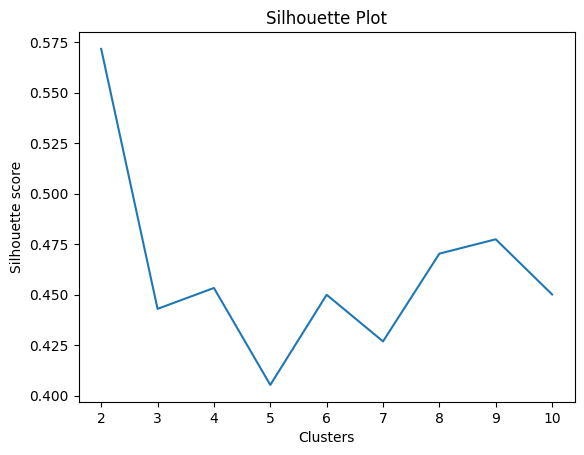

In [ ]:
# Silhouette
silhScores = []

minutesMean = sixManData.groupby('SEASON_ID')['MIN'].mean()
pmMean = sixManData.groupby('SEASON_ID')['PLUS_MINUS'].mean()
minutesArray = minutesMean.values.reshape(-1, 1)
pmArray = pmMean.values.reshape(-1, 1)
twoStatArray = np.hstack((minutesArray, pmArray))

for i in range(2, 11):
  kmeansTest = KMeans(n_clusters=i, n_init = 10) # set to 10 to get the warning to go away
  kmeansTest.fit(twoStatArray)
  silhScores.append(silhouette_score(twoStatArray, kmeansTest.labels_))

plt.plot(range(2, 11), silhScores)
plt.xlabel("Clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette Plot")

Text(0.5, 1.0, 'Davies-Bouldin Plot')

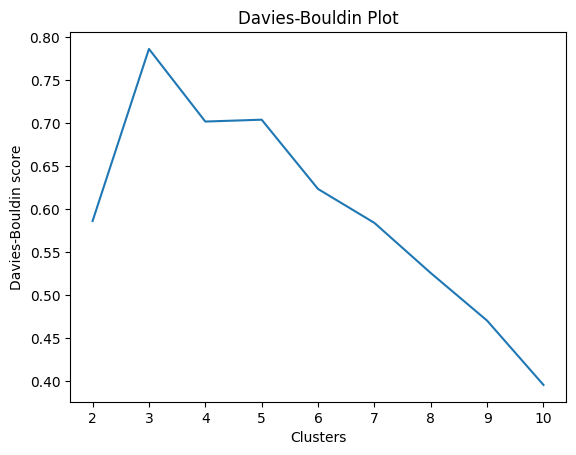

In [ ]:
# Davies-Bouldin
dbScores = []

minutesMean = sixManData.groupby('SEASON_ID')['MIN'].mean()
pmMean = sixManData.groupby('SEASON_ID')['PLUS_MINUS'].mean()
minutesArray = minutesMean.values.reshape(-1, 1)
pmArray = pmMean.values.reshape(-1, 1)
twoStatArray = np.hstack((minutesArray, pmArray))

for i in range(2, 11):
  kmeansTest = KMeans(n_clusters=i, n_init = 10) # set to 10 to get the warning to go away
  kmeansTest.fit(twoStatArray)
  dbScores.append(davies_bouldin_score(twoStatArray, kmeansTest.labels_))

plt.plot(range(2, 11), dbScores)
plt.xlabel("Clusters")
plt.ylabel("Davies-Bouldin score")
plt.title("Davies-Bouldin Plot")

Text(0.5, 1.0, 'Calinski-Harabasz Plot')

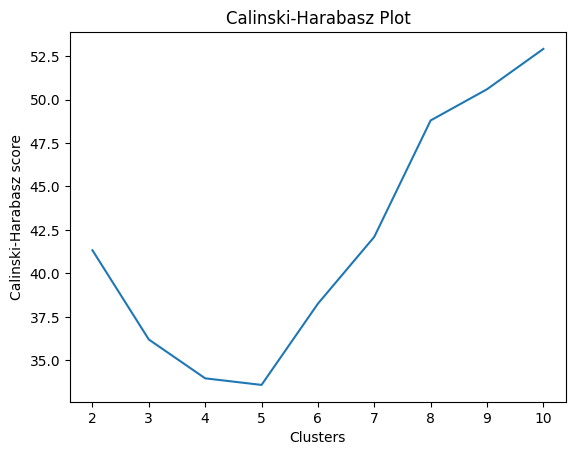

In [ ]:
# Cali-Hara
calScores = []

minutesMean = sixManData.groupby('SEASON_ID')['MIN'].mean()
pmMean = sixManData.groupby('SEASON_ID')['PLUS_MINUS'].mean()
minutesArray = minutesMean.values.reshape(-1, 1)
pmArray = pmMean.values.reshape(-1, 1)
twoStatArray = np.hstack((minutesArray, pmArray))

for i in range(2, 11):
  kmeansTest = KMeans(n_clusters=i, n_init = 10) # set to 10 to get the warning to go away
  kmeansTest.fit(twoStatArray)
  calScores.append(calinski_harabasz_score(twoStatArray, kmeansTest.labels_))

plt.plot(range(2, 11), calScores)
plt.xlabel("Clusters")
plt.ylabel("Calinski-Harabasz score")
plt.title("Calinski-Harabasz Plot")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


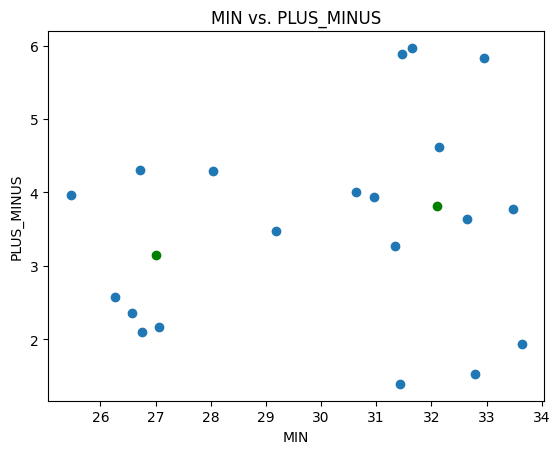

In [ ]:
kMeansTwoStat('MIN', 'PLUS_MINUS', 2)

Text(0, 0.5, 'PLUS_MINUS')

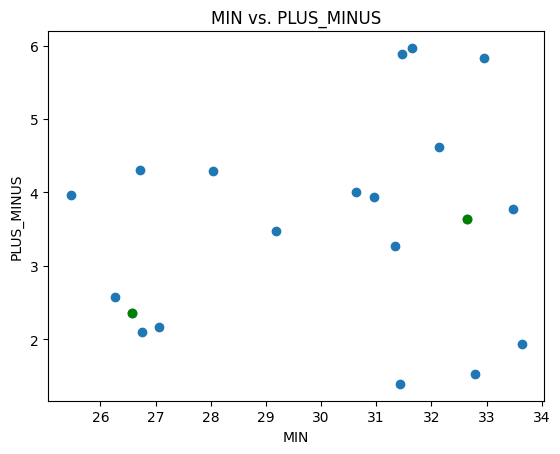

In [ ]:
kmedSix = KMedoids(n_clusters=2)
kmedSix.fit(twoStatArray)
sixTest = kmedSix.cluster_centers_
plt.scatter(twoStatArray.T[0], twoStatArray.T[1])
plt.scatter(sixTest.T[0], sixTest.T[1], c = 'green')
plt.title("MIN vs. PLUS_MINUS")
plt.xlabel("MIN")
plt.ylabel("PLUS_MINUS")

In [ ]:
inertiaTest2 = KMeans(n_clusters=5)
twoStatArray = np.hstack((minutesArray, pmArray))
inertiaTest2.fit(twoStatArray)
print(inertiaTest2.inertia_)
print(kmedSix.inertia_)

17.94469156125191
31.36231173498433


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
